### The marketing team asked you to analyze the behavior of online customers during November and December, the busiest months for shoppers.

* What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called `purchase_rates` in the format below using the exact names for keys.
```python
purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}
```
* What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called `top_correlation` in the format below using the exact names for keys.
```python
top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}
```

* A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called `prob_at_least_100_sales`.

* Optional: plot a binomial probability distribution chart to visualize your chances.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import altair as alt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [34]:
shopping_data = pd.read_csv('online_shopping_session_data.csv')

In [36]:
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [38]:
shopping_data.shape

(12055, 15)

In [40]:
shopping_data['CustomerType'].unique()

array(['Returning_Customer', 'New_Customer', nan], dtype=object)

In [43]:
# Filter data for November and December
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Calculate purchase rates by customer type
purchase_rates_df = nov_dec_data.groupby('CustomerType')['Purchase'].mean()
purchase_rates = purchase_rates_df.to_dict()

# Filter for returning customers in November and December
returning_customers_nov_dec = nov_dec_data[nov_dec_data['CustomerType'] == 'Returning_Customer']

# Calculate correlations between duration columns
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
correlation_matrix = returning_customers_nov_dec[duration_columns].corr()

In [45]:
purchase_rates

{'New_Customer': 0.2733516483516483, 'Returning_Customer': 0.1955937667920473}

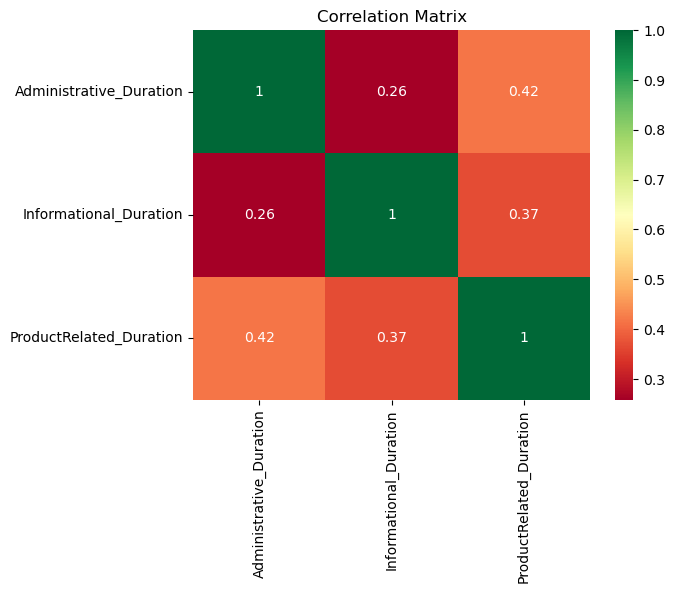

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Find the strongest correlation pair
correlation_matrix_unstacked = correlation_matrix.unstack()
correlation_matrix_sorted = correlation_matrix_unstacked.sort_values(kind="quicksort", ascending=False)

# Remove self-correlations and duplicate pairs
correlation_matrix_sorted = correlation_matrix_sorted[correlation_matrix_sorted != 1.0]
correlation_matrix_sorted = correlation_matrix_sorted.drop_duplicates()

# Get the top correlation
top_correlation_pair = correlation_matrix_sorted.index[0]
top_correlation_value = correlation_matrix_sorted.iloc[0]

top_correlation = {"pair": top_correlation_pair, "correlation": top_correlation_value}

In [51]:
top_correlation

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': 0.41689293883422823}

In [53]:
# Calculate the new purchase rate for returning customers
initial_returning_rate = purchase_rates['Returning_Customer']
boosted_returning_rate = initial_returning_rate * 1.15

# Calculate the probability of at least 100 sales in 500 sessions
n = 500  # Number of trials (sessions)
p = boosted_returning_rate  # Probability of success (purchase)
k = 100  # Minimum number of successes

# Use the cumulative distribution function (CDF) to find P(X >= 100)
# P(X >= 100) = 1 - P(X < 100) = 1 - P(X <= 99)
prob_at_least_100_sales = 1 - stats.binom.cdf(k - 1, n, p)

In [55]:
prob_at_least_100_sales

0.9190464150313484

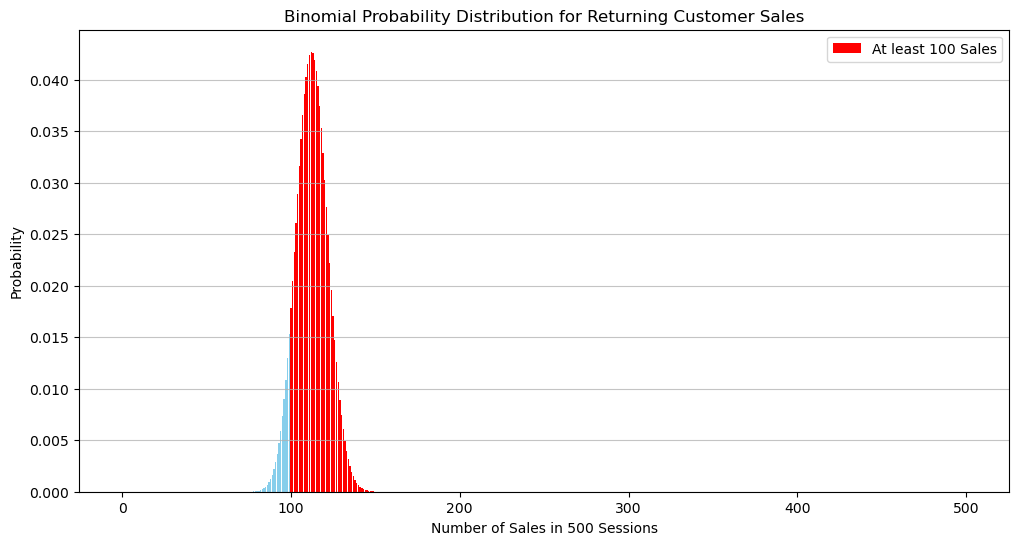

In [57]:
# Optional: plot the binomial distribution using Matplotlib
# Create a range of possible sales numbers
sales_range = list(range(n + 1))

# Calculate the probability mass function (PMF) for each number of sales
probabilities = [stats.binom.pmf(x, n, p) for x in sales_range]

# Create the Matplotlib figure and axes
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
plt.bar(sales_range, probabilities, color='skyblue')

# Highlight the bars representing at least 100 sales
highlight_sales = [x for x in sales_range if x >= k]
highlight_probabilities = [stats.binom.pmf(x, n, p) for x in highlight_sales]
plt.bar(highlight_sales, highlight_probabilities, color='red', label=f'At least {k} Sales')

# Add labels and title
plt.xlabel('Number of Sales in 500 Sessions')
plt.ylabel('Probability')
plt.title('Binomial Probability Distribution for Returning Customer Sales')
plt.legend()
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability

# Show the plot
plt.show()

In [74]:
# New_Customer purchase rate
print(round(purchase_rates['New_Customer'], 3)) # Use the built-in round function

0.273


In [76]:
# Returning customer ppurchase_rates
print(round(purchase_rates['Returning_Customer'], 3))

0.196


In [80]:
# Top cocorrelation
print(round(top_correlation['correlation'], 3))

0.417


In [82]:
prob_at_least_100_sales.round(3)

0.919

### Summary of the analysis:

**Purchase Rates:**
The calculated purchase rate for `Returning Customers` is approximately **0.196**, and for New Customers, it is approximately **0.273**.

**Top Correlation:**
The `strongest correlation` is between ***'Administrative_Duration'*** and ***'Informational_Duration'*** with a correlation value of approximately **0.417**.

**Probability of At Least 100 Sales:**
The calculated `probability of atleast 100 sales` is  approximately **0.919**.

**Binomial Probability Distribution Chart:**
An optional step in the analysis was to visualize the binomial probability distribution for the likelihood of sales for returning customers under the boosted purchase rate. A bar chart was generated using Matplotlib, showing the probability of achieving each possible number of sales from 0 to 500. The bars representing 100 sales or more were highlighted to visually represent the probability calculated for `prob_at_least_100_sales`. This chart provides a visual representation of the distribution of possible sales outcomes.